In [6]:
# 6.
# Eight employees at a small company were asked to choose 3 movies that they would most enjoy
# watching for the upcoming company movie night. These choices are stored in the
# file Employee_Movie_Choices.txt. A second file, Employee_Relationships.txt, has data on the
# relationships between different coworkers. The relationship score has value of -100 (Enemies)
# to +100 (Best Friends). A value of zero means the two employees haven't interacted or are
# indifferent.
# Both files are tab delimited.
# Address following questions using network:

# i. load in the bipartite graph from Employee_Movie_Choices.txt and return that graph.

# ii. Using the graph from the previous question, add nodes attributes named 'type' where
# movies have the value 'movie' and employees have the value 'employee' and return that
# graph. This function should return a networkx graph with node attributes {'type':
# 'movie'} or {'type': 'employee'}

# iii. Find a weighted projection of the graph from answer_two which tells us how many movies
# different pairs of employees have in common.

# iv. Find the Pearson correlation ( using DataFrame.corr() ) between employee relationship

# scores and the number of movies they have in common. If two employees have no
# movies in common it should be treated as a 0, not a missing value, and should be
# included in the correlation calculation.

In [7]:
import networkx as nx
import pandas as pd
import numpy as np
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
def plot_graph(G):
    plt.figure(figsize=(8, 6))
    nx.draw(G, with_labels=True)
    plt.show()

In [9]:
def answer_one():
    edges = []
    with open("Employee_Movie_Choices.txt", "r") as file:
        for line in file:
            edge = line.strip().split("\t")
            edges.append(edge)
    G = nx.Graph()
    G.add_edges_from(edges)
    return G

In [10]:
answer_one()

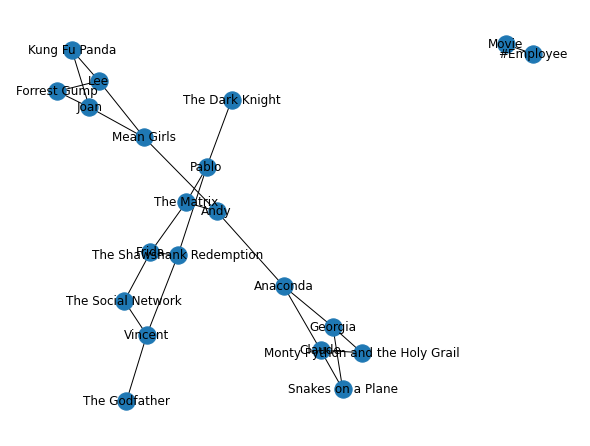

In [11]:
plot_graph(answer_one())

In [13]:
employees = set()
movies = set()
with open("Employee_Movie_Choices.txt", "r") as file:
    next(file)
    for line in file:
        employees.add(line.strip().split("\t")[0])
        movies.add(line.strip().split("\t")[1])

In [14]:
def answer_two():
    
    G = answer_one()
    for node in G.nodes():
        if node in employees:
            G.add_node(node, type="employee")
        else:
            G.add_node(node, type="movie")
    return G

In [15]:
answer_two()

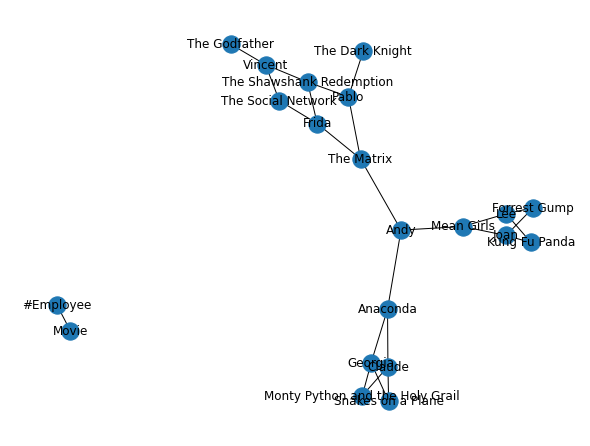

In [16]:
plot_graph(answer_two())

In [17]:
def answer_three():
    B = answer_two()
    weighted_projection = bipartite.weighted_projected_graph(B, employees)
    return weighted_projection

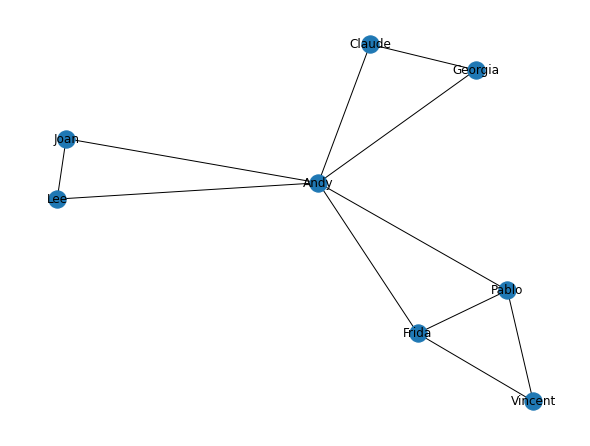

In [18]:
plot_graph(answer_three())

In [21]:
def answer_four():
        
    Rel = nx.read_edgelist('Employee_Relationships.txt', data=[('relationship_score', int)])
    Rel_df = pd.DataFrame(Rel.edges(data=True), columns=['From', 'To', 'relationship_score'])
    G = answer_three()
    G_df = pd.DataFrame(G.edges(data=True), columns=['From', 'To', 'movies_score'])
    G_copy_df = G_df.copy()
    G_copy_df.rename(columns={"From":"From_", "To":"From"}, inplace=True)
    G_copy_df.rename(columns={"From_":"To"}, inplace=True)
    G_final_df = pd.concat([G_df, G_copy_df])
    final_df = pd.merge(G_final_df, Rel_df, on = ['From', 'To'], how='right')
    final_df['movies_score'] = final_df['movies_score'].map(lambda x: x['weight'] if type(x)==dict else None)
    final_df['relationship_score'] = final_df['relationship_score'].map(lambda x: x['relationship_score'])
    final_df['movies_score'].fillna(value=0, inplace=True)
    return final_df['movies_score'].corr(final_df['relationship_score'])

In [22]:
answer_four()

0.7883962221733474